# Assignment 2: Exploratory Data Analysis and Visualization 


## Case study: Bike Sharing 

## Due date: 11:59pm on Monday, January 31, 2022 

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you write your solutions individually. If you do discuss the assignments with others please include their names below.

**Collaborators: list collaborators here**

### Background Information: 

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C.

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

    1. reading CSV data into pandas
    2. wrangling data for analysis
    3. using EDA to learn about your data
    4. making informative plots


#### Note about the plots: 

For ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?

In [3]:
#import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

### Load Bikesharing Data

The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

| Variable   | Description                                                                                       |
|------------|---------------------------------------------------------------------------------------------------|
| instant    | record index                                                                                      |
| dteday     | date                                                                                              |
| season     | 1. spring 2. summer 3. fall 4. winter                                                             |
| yr         | year (0: 2011, 1:2012)                                                                            |
| mnth       | month ( 1 to 12)                                                                                  |
| hr         | hour (0 to 23)                                                                                    |
| holiday    | whether day is holiday or not                                                                     |
| weekday    | day of the week                                                                                   |
| workingday | if day is neither weekend nor holiday                                                             |
| weathersit | 1. clear or partly cloudy<br>2. mist and clouds<br>3. light snow or rain<br>4. heavy rain or snow |
| temp       | normalized temperature in Celsius (divided by 41)                                                 |
| atemp      | normalized "feels-like" temperature in Celsius (divided by 50)                                    |
| hum        | normalized percent humidity (divided by 100)                                                      |
| windspeed  | normalized wind speed (divided by 67)                                                             |
| casual     | count of casual users                                                                             |
| registered | count of registered users                                                                         |
| cnt        | count of total rental bikes including casual and registered                                       |


In [4]:
# import data
bike = pd.read_csv("bikeshare.csv")
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### 0. Examining the data

#### Qestion 0A 

What is the granularity of the data (i.e. what does each row represent)?

Each row represents the record of the time components, environmental conditions, and users for an hour. 

In [ ]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

#### Question 0B 

For this assignment, we'll be using this data to study bike usage in Washington D.C. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that you can collect to address some of these limitations?

The data only shows the count of users but could misrepresents the use of the bike sharing program. Tracking the duration of the use may be a variable that allows us to gain more insight on the use of the bikes. The granularity can be adjusted both finer and coarser so that we could observe different patterns. Making the granualarity coarser (by agg.) we can determine daily, weekly, monthly, and yearly trends. Making the granularity finer we observe each distinct ride. Some variables may be added in this case, like for example average speed, duration, number of stops, etc., to allows us to improve our analysis of the program. 


In [ ]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

### 1. Data Preparation

A few of the variables that are numeric/integer actually encode categorical data. These include holiday, weekday, workingday, and weathersit. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (Sun, Mon, Tue, Wed, Thu, Fri, and Sat) for weekday. You may simply use yes/no for holiday and workingday.

In this exercise we will create new columns in the data frame. 


### Question 1

#### Question 1A (Decoding weekday, workingday, and weathersit)

Decode the _holiday, weekday, workingday, and weathersit_ fields and create four more columns:

    1. holiday: Convert to yes and no. Hint: There are fewer holidays...
    2. weekday: It turns out that Monday is the day with the most holidays. Mutate the 'weekday' column to use 
    the 3-letter label ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', and 'Sat' ...) instead of its current numerical  values. Assume 0 corresponds to Sun, 1 to Mon and so on.
    3. workingday: Convert to yes and no.
    4. weathersit: You should replace each value with one of Clear, Mist, Light, or Heavy. Assume 1 corresponds to Clear, 2 corresponds to Mist, and so on.


In [10]:
# Modify holiday weekday, workingday, and weathersit here
bike2 = bike

bike2['holiday'] = bike2['holiday'].replace({1:"yes", 0:"no"})
bike2['weekday'] = bike2['weekday'].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
bike2['workingday'] = bike2['workingday'].replace({1:"yes", 0:"no"})
bike2['weathersit'] = bike2['weathersit'].replace({1:"Clear", 2:"Mist", 3:"Light", 4:"Heavy"})
bike2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


#### Question 1B (Holidays)

How many entries in the data correspond to holidays? Set the variable num_holidays to this value.


In [18]:
num_holidays = bike['holiday'].value_counts()[1]

#### Question 1C (Computing Daily Total Counts)

In the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named *daily_counts* indexed by dteday with the following columns:

    * casual: total number of casual riders for each day
    * registered: total number of registered riders for each day
    * workingday: whether that day is a working day or not (yes or no)

Hint: *groupby* and *agg*. For the *agg* method, please check the documentation for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to groupby and agg. For the workingday column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the 'first' or 'last' aggregation functions.

In [22]:
daily_counts = bike2.groupby('dteday').agg({"casual":"sum", "registered":"sum", "workingday":"last"})
print(daily_counts)

            casual  registered workingday
dteday                                   
2011-01-01     331         654         no
2011-01-02     131         670         no
2011-01-03     120        1229        yes
2011-01-04     108        1454        yes
2011-01-05      82        1518        yes
...            ...         ...        ...
2012-12-27     247        1867        yes
2012-12-28     644        2451        yes
2012-12-29     159        1182         no
2012-12-30     364        1432         no
2012-12-31     439        2290        yes

[731 rows x 3 columns]


### 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.

#### Question 2 

#### Question 2A

Use the _sns.distplot_ function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent casual riders, and green to represent registered riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1C. You can ignore all warnings that say distplot is a deprecated function.

Include a legend, xlabel, ylabel, and title. Read the seaborn plotting tutorial if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


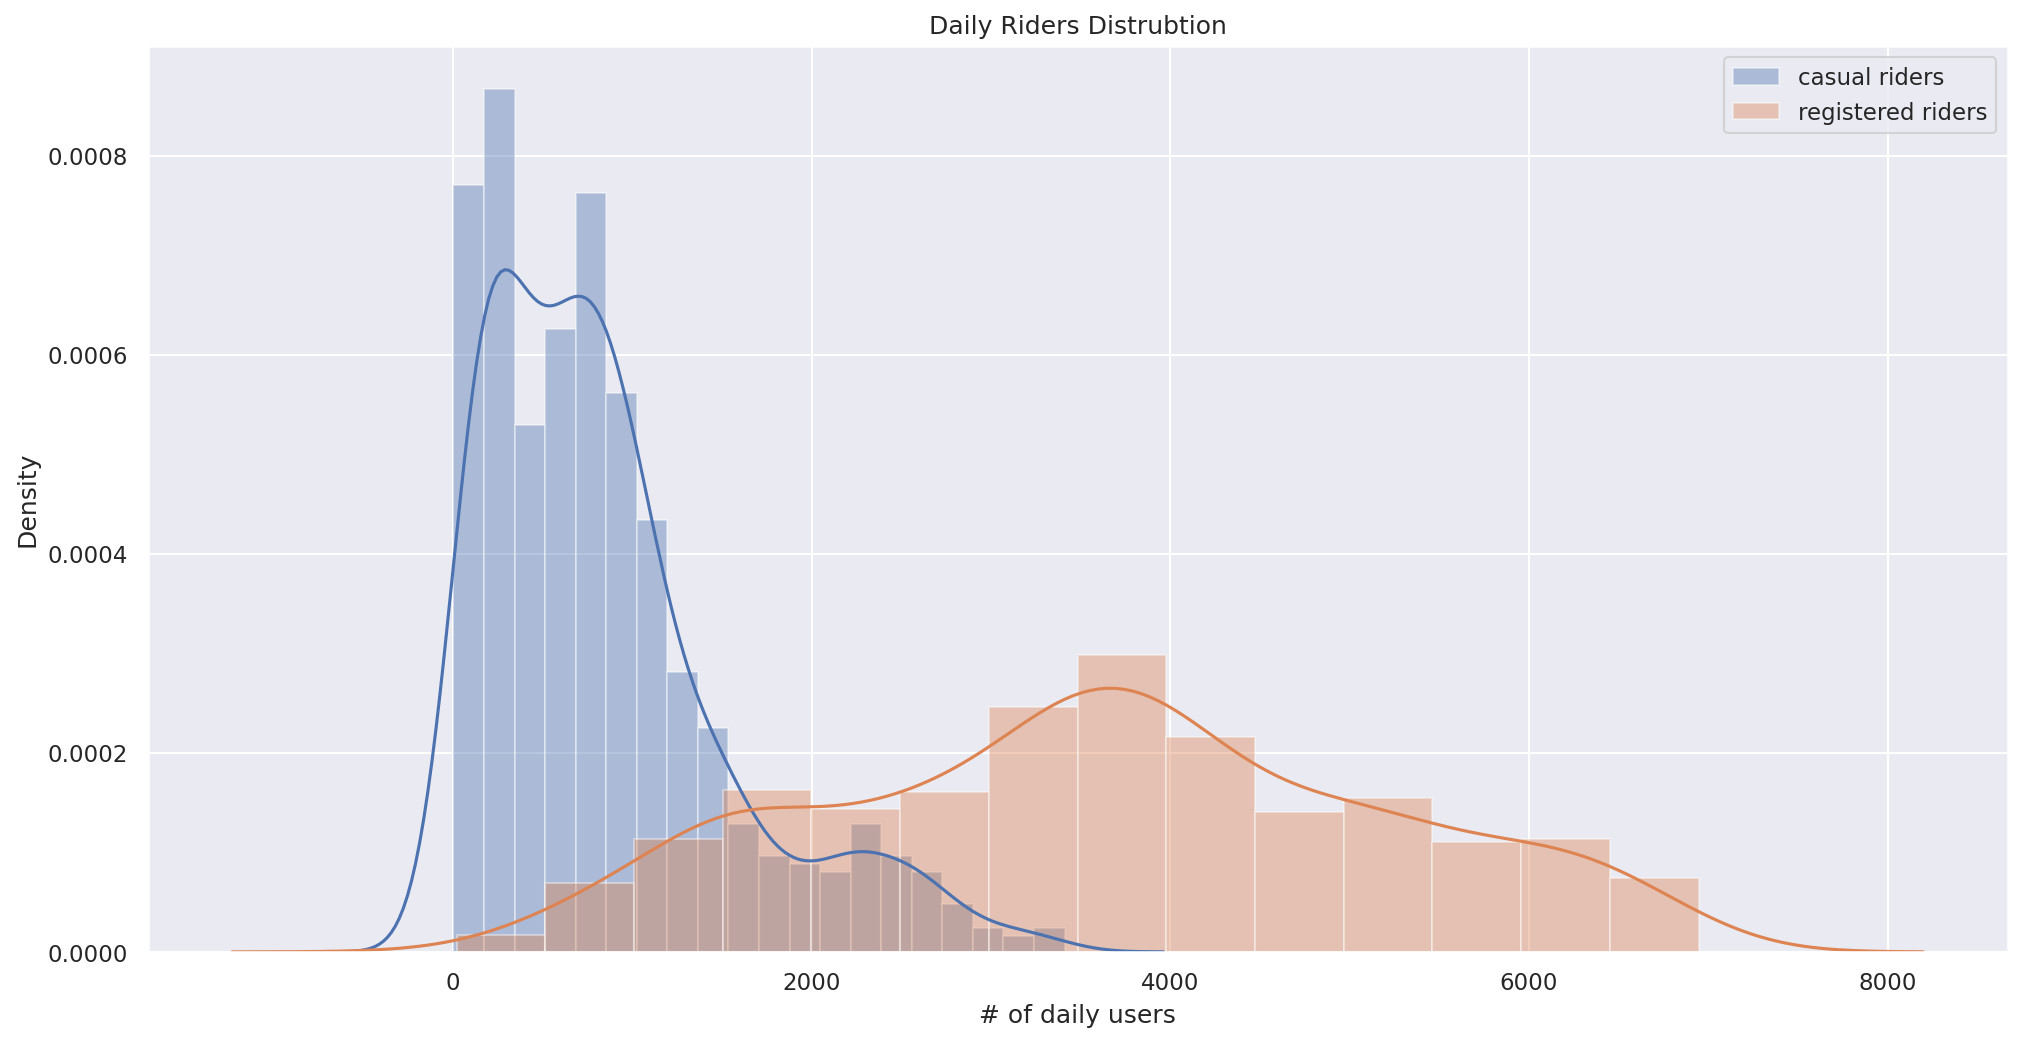

In [34]:
sns.distplot(daily_counts.casual,label = "casual riders")
sns.distplot(daily_counts.registered, label = "registered riders")
plt.xlabel("# of daily users")
plt.title("Daily Riders Distrubtion")
plt.legend()

#### Question 2B

In the cell below, descibe the differences you notice between the density curves for casual and registered riders. Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers. Include a comment on the spread of the distributions.

The distribution of casual and registered riders is fundamentally different in several ways. The distribution of casual riders is bimodal whereas the distribution of registered riders is unimodal. The distribution of registered riders is very symmetrical whereas, the distribution of casual users is skewed to the right. The distribution of the registered riders has two tails that seem to be of similar length and contain a significant amount of data relative to the small quantity of data in the single tail of the distribution of casual riders. The distribution of casual riders has a smaller range and the data has smaller spread than the distribution of registered riders which can range from zero to 7000.


#### Question 2C

The density plots do not show us how the counts for registered and casual riders vary together. Use _sns.lmplot_ to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the bike DataFrame to plot hourly counts instead of daily counts.

The _lmplot_ function will also try to draw a linear regression line. Colour the points in the scatterplot according to whether or not the day is a working day.

There are many points in the scatter plot, so make them small to help reduce overplotting. Also make sure to set _fit_reg=True_ to generate the linear regression line. You can set the height parameter if you want to adjust the size of the lmplot.

Ellipsis

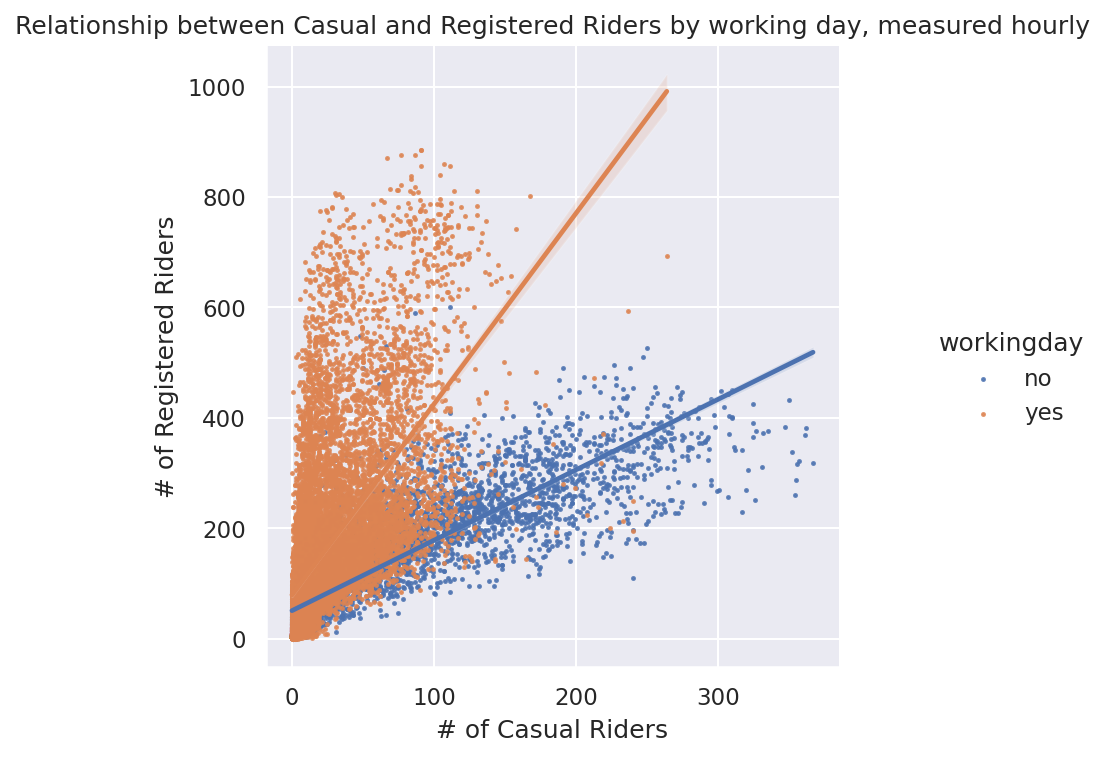

In [76]:
# Make the font size a bit bigger
sns.set(font_scale=1)
sns.lmplot(x="casual",y="registered",hue="workingday",fit_reg=True,data=bike,scatter_kws={"s": 2})
plt.xlabel("# of Casual Riders")
plt.ylabel("# of Registered Riders")
plt.title("Relationship between Casual and Registered Riders by working day, measured hourly")
...

####  Question 2D

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does overplotting have on your ability to describe this relationship?

It is evident that, regardless of whether or not it is a working day, the number of casual riders is positively correlated to the number of registered riders. The strength of the positive correlation is stronger on non-working-days than on working days. Overplotting makes it difficult to guage whether or not the relationship for non-working-days is as strong for the left side of plot as it is for the centre and right side of the plot since the points are covered by overplotting from the working-day data points.


### 3: Understanding Daily Patterns

#### Question 3

#### Question 3A

Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the entire dataset, stratified by rider type. Your plot should have different colored lines for different kinds of riders.

/tmp/ipykernel_82/3718393051.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_avg = bike.groupby('hr')['registered','casual'].mean()


Text(0.5, 1.0, 'Hourly behaviour of Riders')

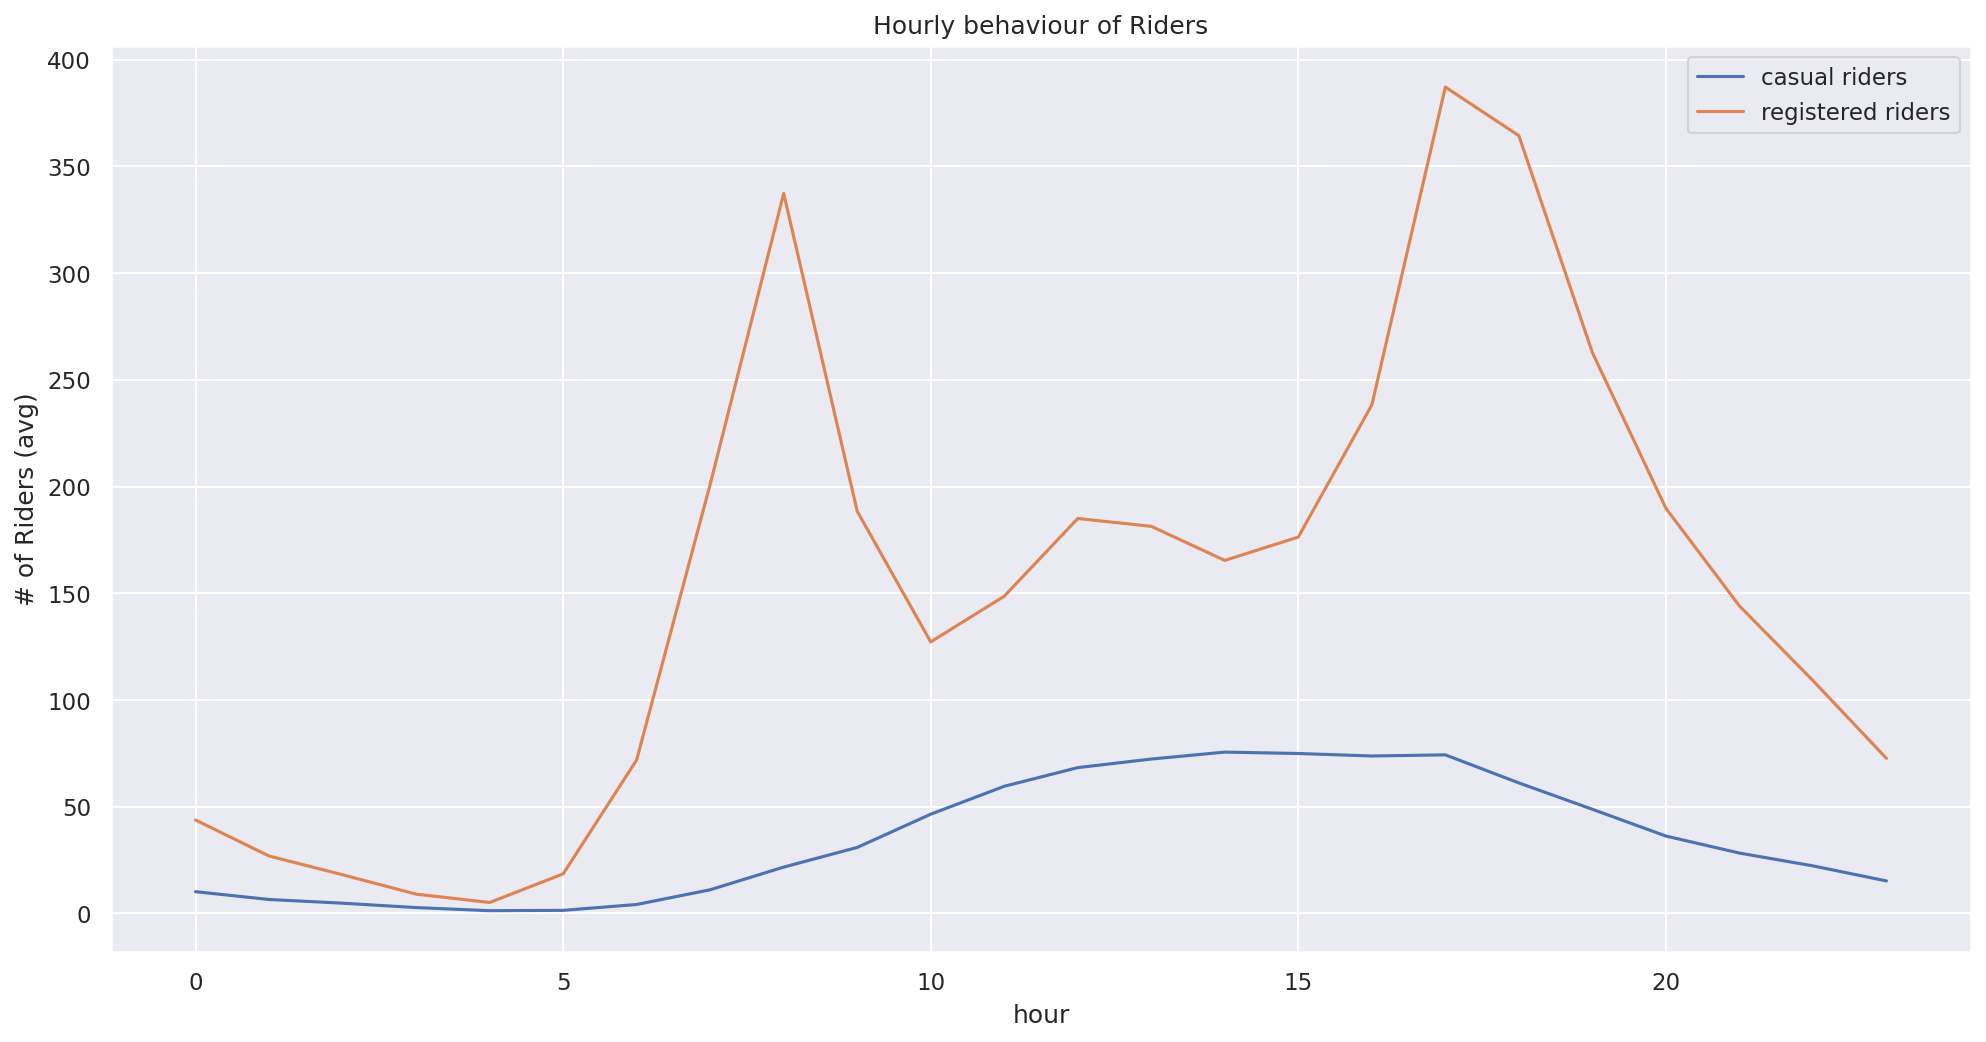

In [59]:
hourly_avg = bike.groupby('hr')['registered','casual'].mean()
hourly_avg['hour'] = np.arange(0,24)
sns.lineplot(x='hour', y='casual', label='casual riders', data=hourly_avg);
sns.lineplot(x='hour', y='registered', label='registered riders', data=hourly_avg);
plt.ylabel("# of Riders (avg)")
plt.title("Hourly behaviour of Riders")

#### Question 3B

What can you observe from the plot? Hypothesize about the meaning of the peaks in the registered riders' distribution.

The plot of the registered users flucuates more than the plot of the casual users, which has smaller average counts and is fairly stagnant throughout. The distribution of the registered user has two peaks which I believe is due to people using the bike sharing to commute to work. These people are more likely to be registered because they know they are going to be using the bike sharing system every workday to get to work. The first peak is around 7/8 hours, which represents the commute to work and the second peak at 16/17 hours is the commute from work.


### 4. Exploring Ride Sharing and Weather

Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

#### Question 4

#### Question 4A 

Create a new column _prop_casual_ in the bike DataFrame representing the proportion of casual riders out of all riders for each record. 

In [63]:
bike['prop_casual']  = bike['casual'] / bike['cnt']

#### Question 4B

In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using sns.scatterplot. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.


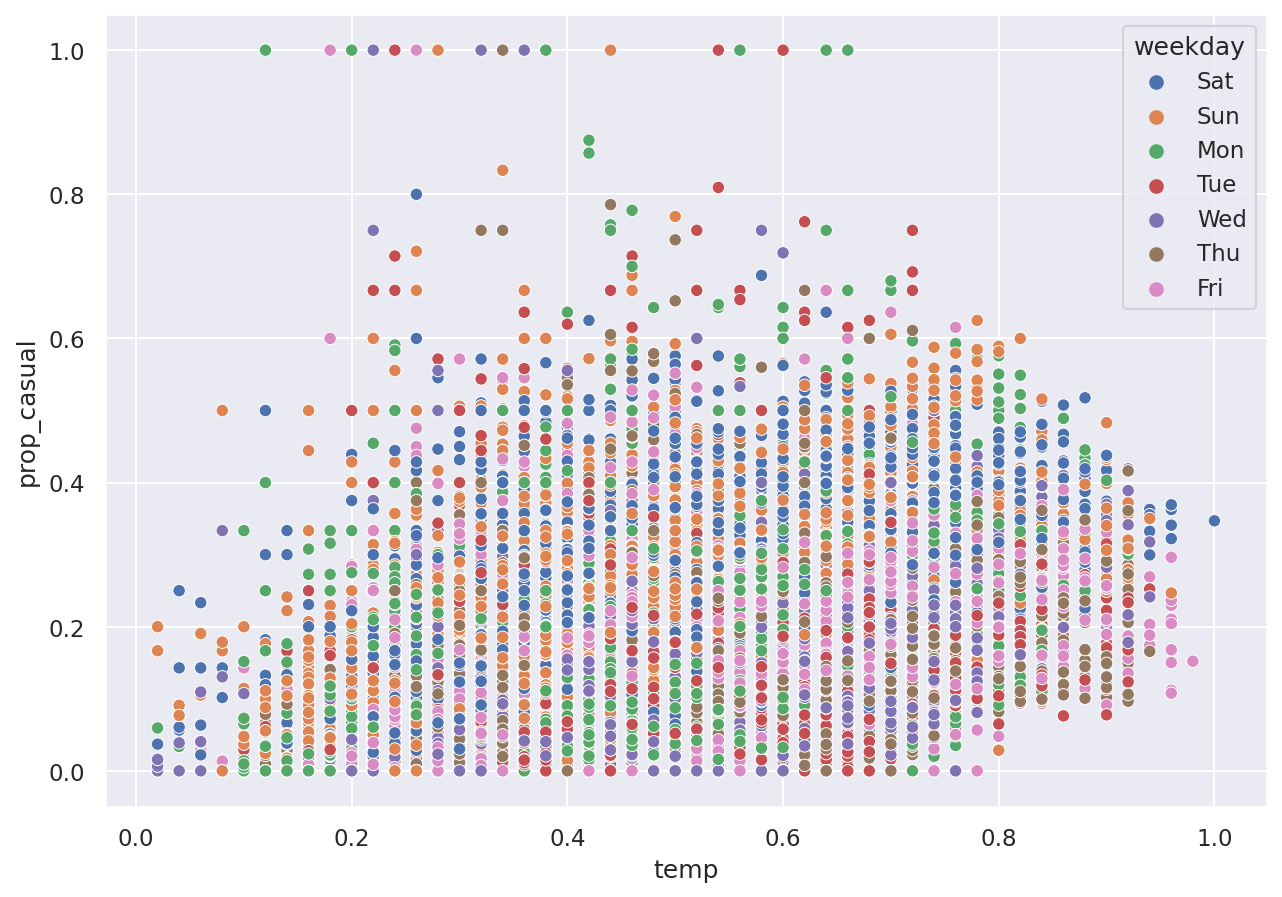

In [65]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using sns.lmplot as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing.

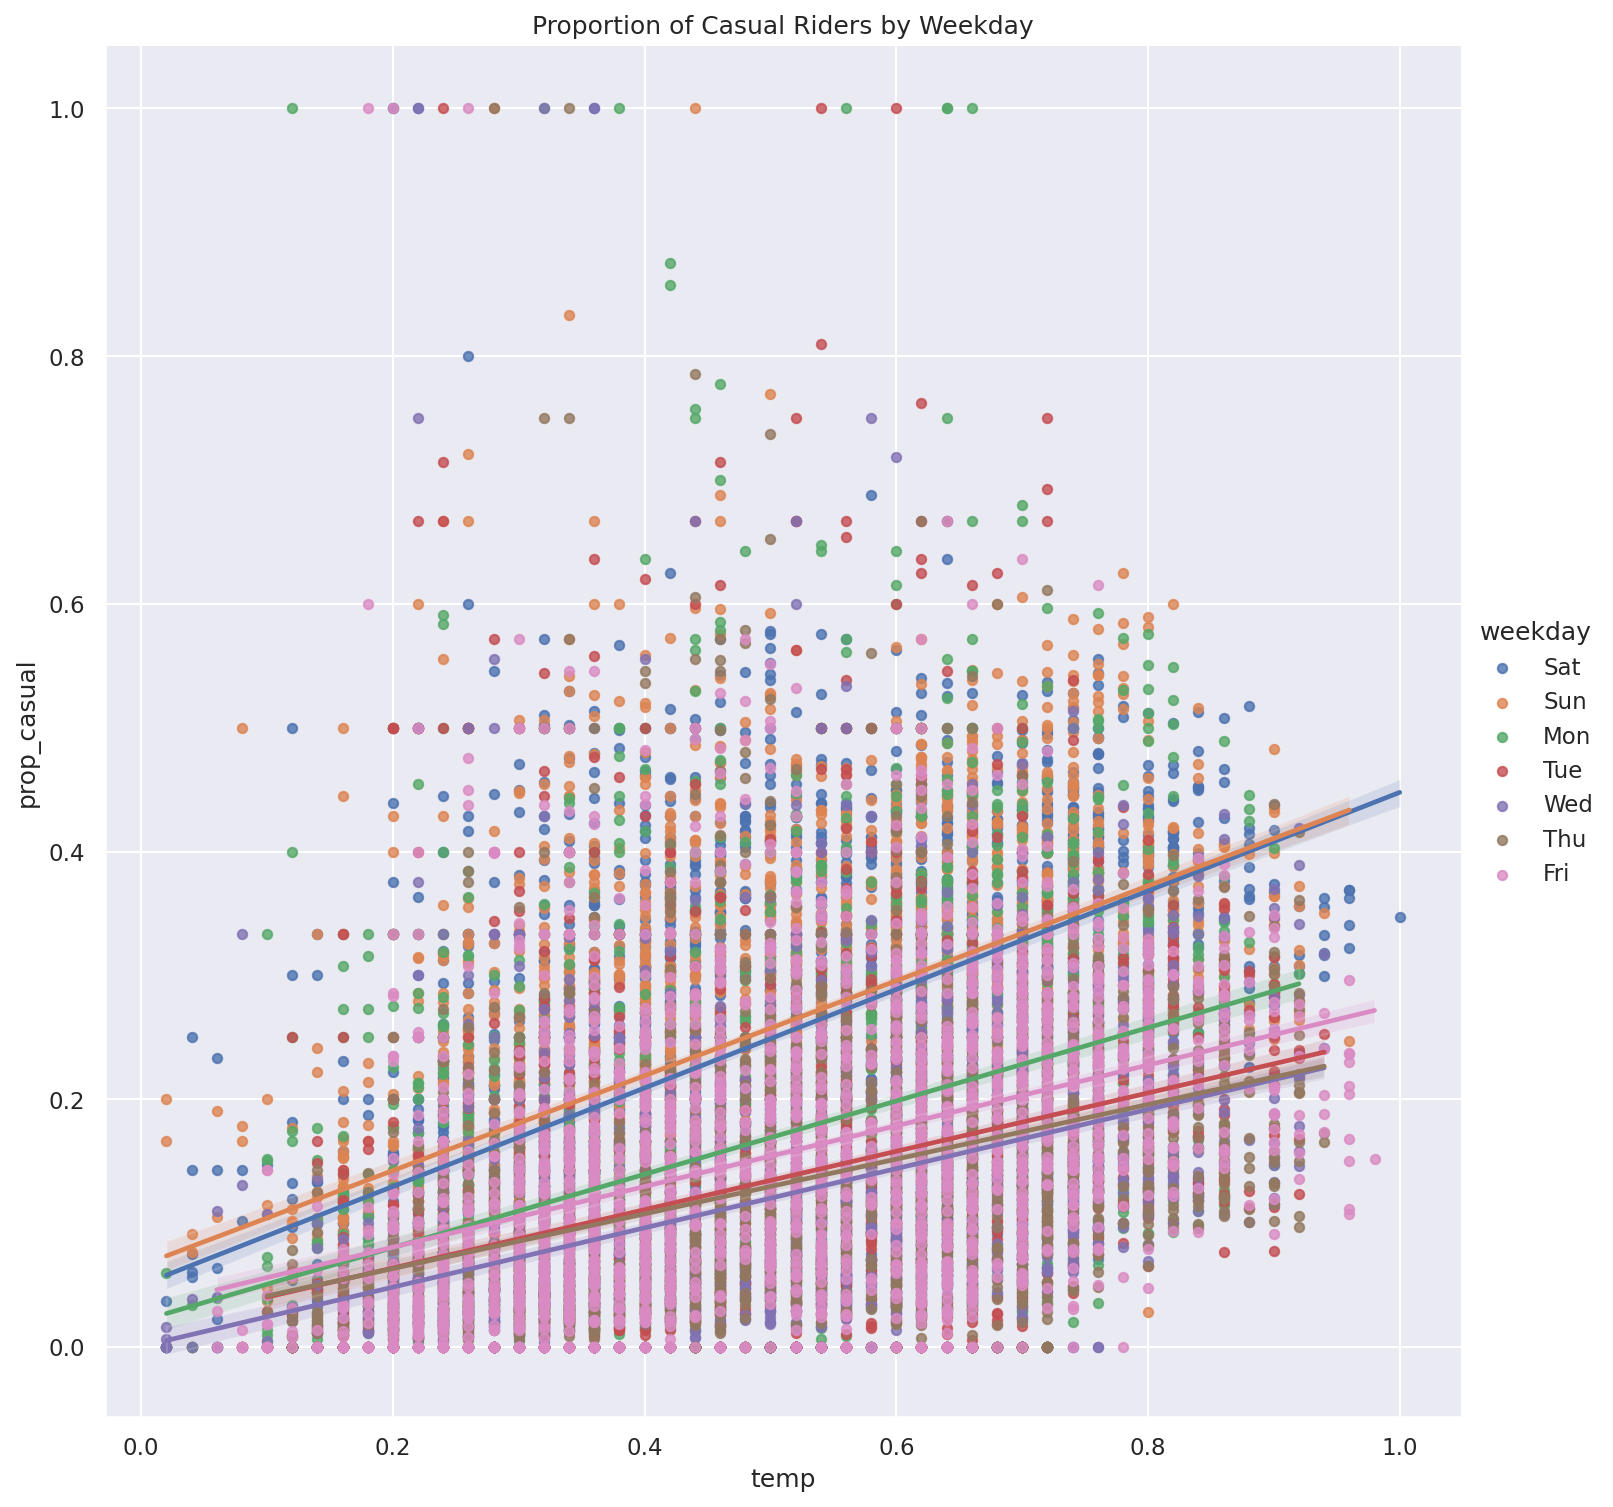

In [66]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


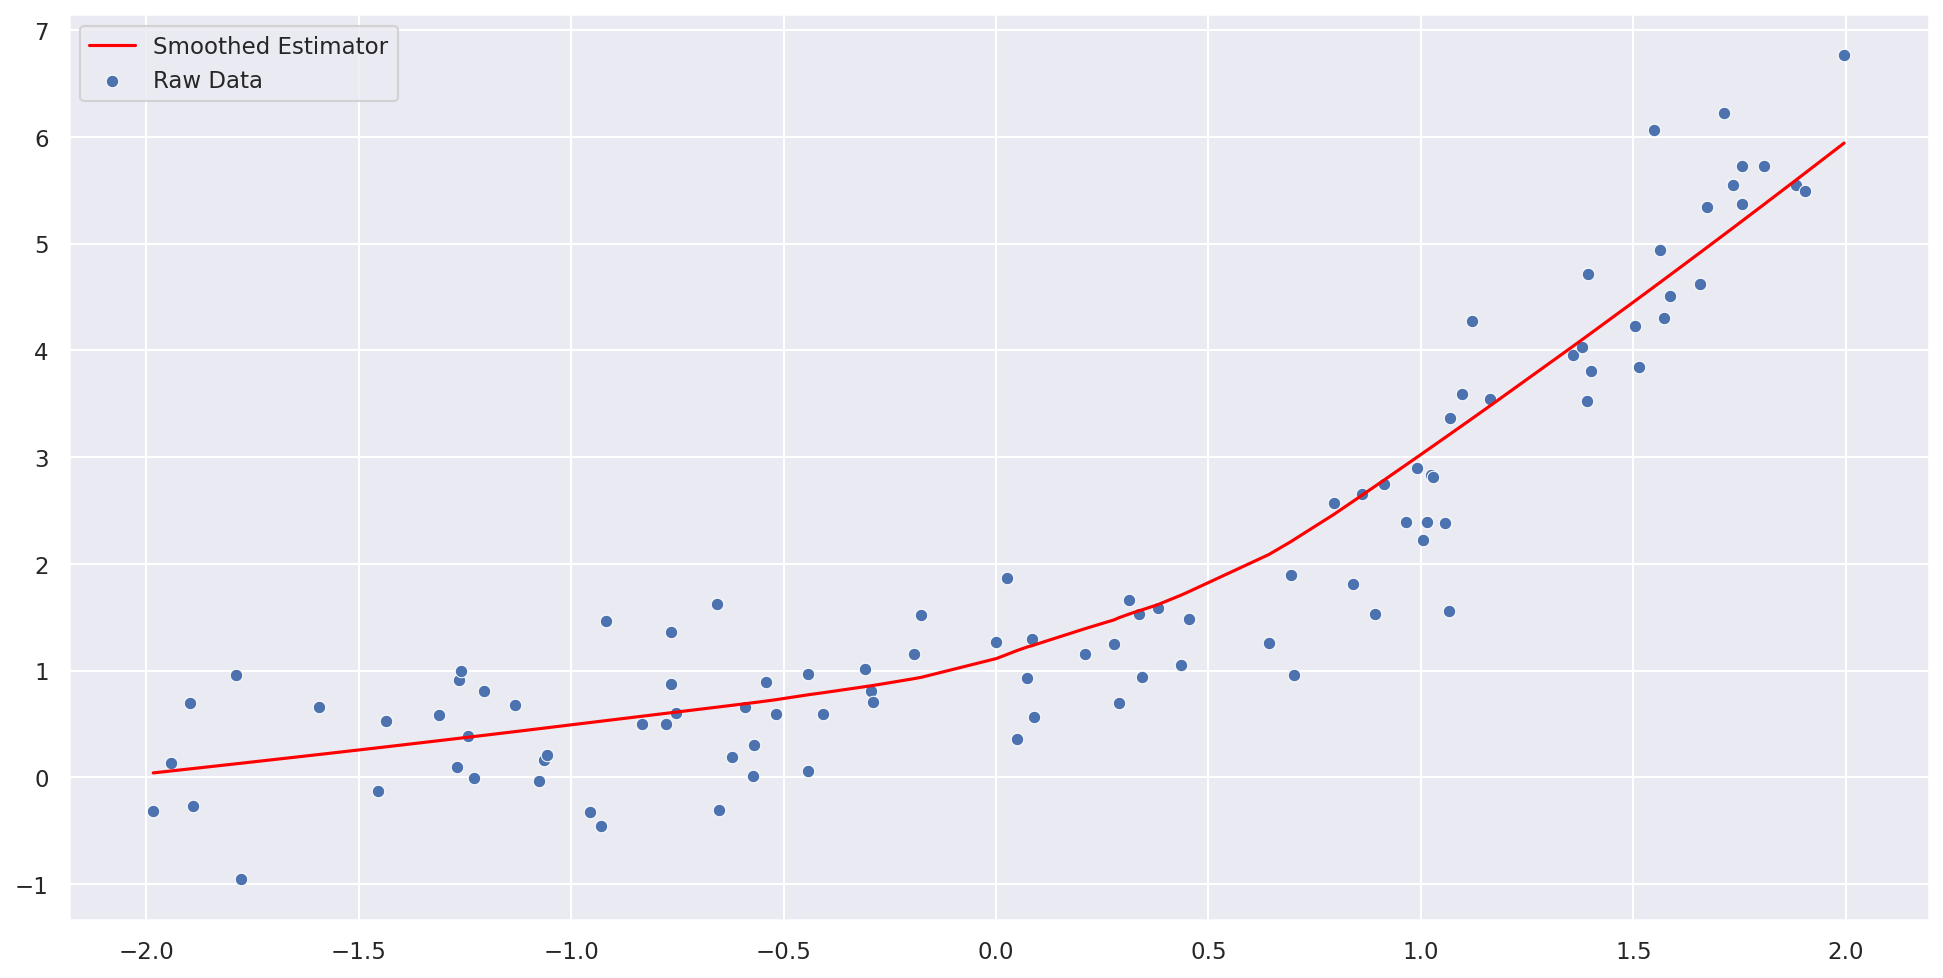

In [67]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

You should use statsmodels.nonparametric.smoothers_lowess.lowess just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

You do not need to match the coloUrs on our sample plot as long as the colours in your plot make it easy to distinguish which day they represent.

Hints:

    Start by just plotting only one day of the week to make sure you can do that first.

    The lowess function expects y coordinate first, then x coordinate.

    Look at the top of this homework notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well! 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-pack

Text(0.5, 1.0, 'Relationship between temperature and the proportion of casual riders by day of the week')

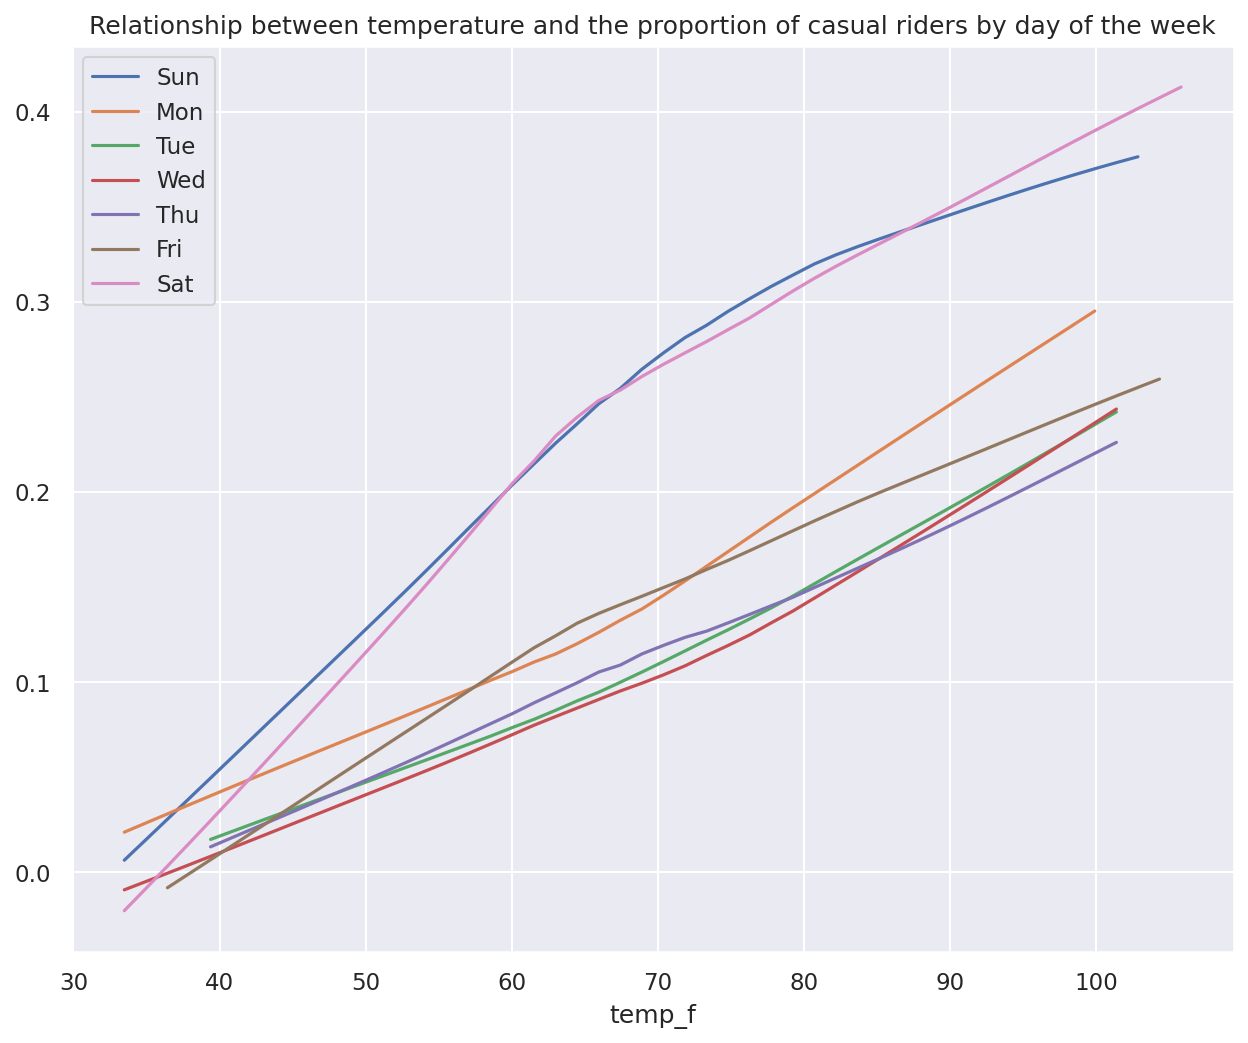

In [78]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))

for wday in ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]:
    bike2 = bike[bike.weekday == wday].copy()
    bike2['temp_f'] = (bike2['temp']*41) * (9/5) + 32
    ysmooth = lowess(bike2['prop_casual'], bike2['temp_f'], return_sorted=False)
    sns.lineplot(bike2['temp_f'], ysmooth, label = wday)
    
plt.title("Relationship between temperature and the proportion of casual riders by day of the week")

#### Question 4C 

What do you see from the curve plot? How is prop_casual changing as a function of temperature? Do you notice anything else interesting?

From the curve plot, you can conclude that the temperature is positively correlated to the proportion of casual riders. The proportion of casual riders is far larger on weekends which I believe is not because there are more casual riders, but because there are less registered riders. Based on the results from question 3B, one could make the assumption that people who use the bike share program to commute to work are likely registered users. Furthermore, one may also assume that these people are not commuting to work on weekends and thus there are not as many registered users using the bike share program on weekends which leads to a higher proportion of casual users.   


### Question 5 (Open-Ended Question) 

Imagine you are working for a Bike Sharing Company that collaborates with city planners, transportation agencies, and policy makers in order to implement bike sharing in a city. These stakeholders would like to reduce congestion and lower transportation costs. They also want to ensure the bike sharing program is implemented equitably. In this sense, equity is a social value that is informing the deployment and assessment of your bike sharing technology.

Equity in transportation includes: improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford the transportation services, and assessing how inclusive transportation systems are over time.

Do you think the bike data as it is can help you assess equity? If so, please explain. If not, how would you change the dataset? You may discuss how you would change the granularity, what other kinds of variables you'd introduce to it, or anything else that might help you answer this question.

I do not think that the data from this set is adequate for applying equity to the bike sharing program. The most sensical way of assessing equity is on an individual basis. Only by analyzing patterns and summaries of the attributes of individual riders will we be able to make concrete and informed statements about equity in the bike sharing perspective. The limiting factor of this assessment is the granularity of the data. Each data member (row) of the set is a representation of a specific hour of bike share program. Converting it so that each data member is a representation of the rider of bike, with the addition of new columns (age, race, socio-economic class, etc), would allow us to throughly assess equity. The idea of equitably implementing the program is, in a sense, counterproductive because the modern world is becoming more alert to the protection of our data privacy. In order to create a more equitable environment we would have to enfringe on the personal data of the riders. This is a dilemna that is out of my scope, but a very thought-provoking one nonetheless. I feel like this general idea can be applied to many other envirnoments where data is collected and enlightens us on the complexity of balancing ethicacy and insight. 
